In [1]:
import pandas as pd
df = pd.read_csv("wetland_data_file.txt", sep="\t")

clean_df = df[df[df.columns[0]].str.startswith("CW", na=False)]
clean_df.columns = ["Sample", "COD before", "COD after", "TN before", "TN after"]

print(clean_df)
clean_df.columns



   Sample  COD before  COD after  TN before  TN after
0   CWI 1        12.2       10.4      12.39     11.20
1   CWI 2        12.0       10.5      11.13      9.87
2   CWI 3         9.8        9.1      10.36      9.68
3   CWI 4        10.0        8.7      11.76      9.20
7   CWT 1        18.4       16.3      14.07     12.30
8   CWT 2        16.4       14.9      13.44     11.70
9   CWT 3        16.0       14.6      13.02     12.10
10  CWT 4        20.0       18.2      13.65     12.50
14  CWC 1        16.0       14.3      13.86     12.30
15  CWC 2        18.0       16.4      13.30     12.10
16  CWC 3        14.0       12.6      12.39     11.40
17  CWC 4        15.0       13.7      11.76     10.20


Index(['Sample', 'COD before', 'COD after', 'TN before', 'TN after'], dtype='object')

In [2]:
tn_before_mean = clean_df["TN before"].mean()
tn_before_median = clean_df["TN before"].median()
tn_before_std = clean_df["TN before"].std()

tn_after_mean = clean_df["TN after"].mean()
tn_after_median = clean_df["TN after"].median()
tn_after_std = clean_df["TN after"].std()

In [3]:
print("total nitrogen average concentration before filtration: ", tn_before_mean)
print("total nitrogen median concentration before filtration: ", tn_before_median)
print("total nitrogen standard deviation of concentration before filtration: ", tn_before_std)

print("total nitrogen average concentration after filtration: ", tn_after_mean)
print("total nitrogen median concentration after filtration: ", tn_after_median)
print("total nitrogen standard deviation of concentration after filtration: ", tn_after_std)

total nitrogen average concentration before filtration:  12.594166666666666
total nitrogen median concentration before filtration:  12.705
total nitrogen standard deviation of concentration before filtration:  1.1638686143698316
total nitrogen average concentration after filtration:  11.2125
total nitrogen median concentration after filtration:  11.55
total nitrogen standard deviation of concentration after filtration:  1.1715345414532952


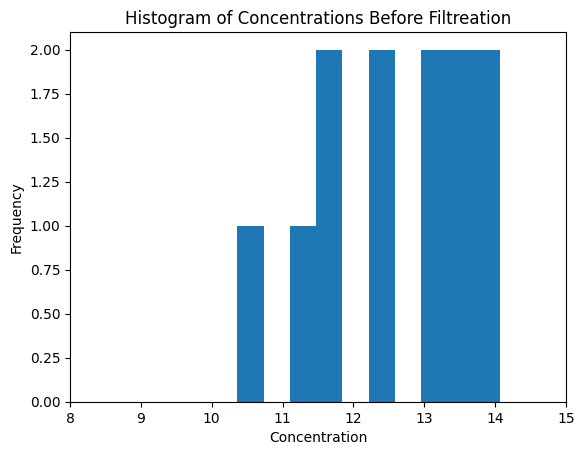

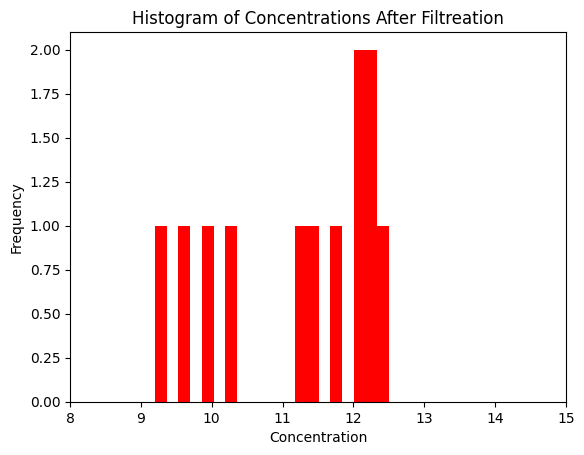

In [4]:
import matplotlib.pyplot as plt
plt.hist(clean_df["TN before"], bins = 10)
plt.ylabel("Frequency")
plt.xlabel("Concentration")
plt.xlim(8, 15)
plt.title("Histogram of Concentrations Before Filtreation")
plt.show()

plt.hist(clean_df["TN after"], bins = 20, color = "red")
plt.title("Histogram of Concentrations After Filtreation")
plt.ylabel("Frequency")
plt.xlabel("Concentration")
plt.xlim(8, 15)
plt.show()

In [5]:
from scipy.stats import pearsonr, spearmanr
pearson = pearsonr(clean_df["TN before"], clean_df["TN after"])
print("Pearson Correlation: ", pearson)
spearman = spearmanr(clean_df["TN before"], clean_df["TN after"])
print("Spearman Correlation: ", spearman)

Pearson Correlation:  PearsonRResult(statistic=0.9090677180156089, pvalue=4.196225111466693e-05)
Spearman Correlation:  SignificanceResult(statistic=0.9225352112676055, pvalue=1.9269023771788328e-05)


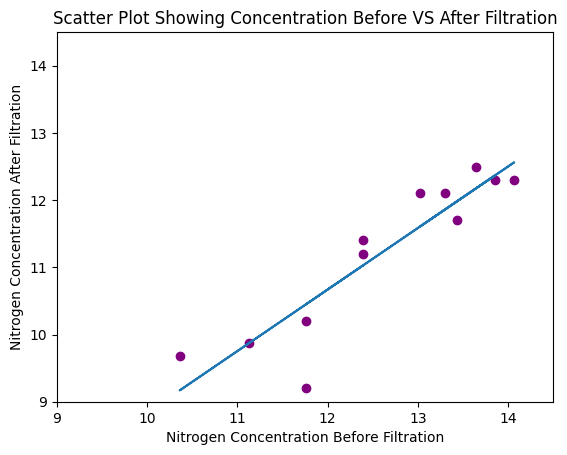

In [31]:
from scipy.stats import linregress

line = linregress(clean_df["TN before"], clean_df["TN after"])

plt.plot(clean_df["TN before"], line.slope*clean_df["TN before"] + line.intercept)
plt.title("Scatter Plot Showing Concentration Before VS After Filtration")
plt.xlabel("Nitrogen Concentration Before Filtration")
plt.ylabel("Nitrogen Concentration After Filtration")
plt.xlim(9,14.5)
plt.ylim(9,14.5)
plt.scatter(clean_df["TN before"], clean_df["TN after"], c = "purple")

In [32]:
# since a scatter plot isn't as applicable to my data set, I will do a t test, which will compare my data better

import scipy.stats as stats


tn_before = clean_df["TN before"]
tn_after = clean_df["TN after"]

t_stat, p_value = stats.ttest_rel(tn_before, tn_after)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 9.610342779960575
p-value: 1.098166158613403e-06


In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df_new = clean_df.drop('Sample', axis=1)
df_new.columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_new)
pca = PCA(n_components = 0.99)
PCs = pca.fit_transform(scaled_data)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.91856716 0.05880112 0.02211844]


In [13]:
loadings = pd.Series(pca.components_[0], index=df_new.columns)
print(loadings)

COD before   -0.509179
COD after    -0.503418
TN before    -0.489646
TN after     -0.497548
dtype: float64


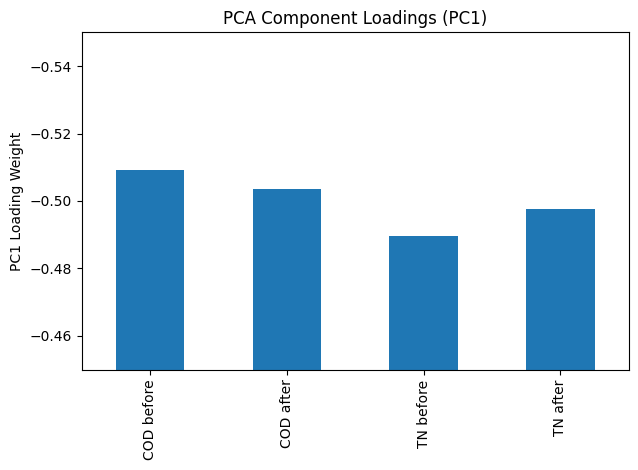

In [18]:

loadings.plot(kind='bar')
plt.ylabel("PC1 Loading Weight")
plt.title("PCA Component Loadings (PC1)")
plt.tight_layout()
plt.ylim(-0.45,-0.55)
plt.show()

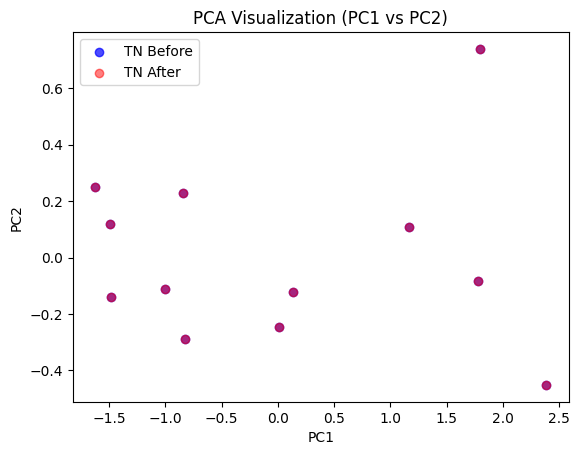

In [38]:
plot_df_before = pd.DataFrame({"PC1": PCs[:,0], "PC2": PCs[:,1], col: df_new["TN before"]})


plt.scatter(plot_df_before["PC1"], plot_df_before["PC2"], color="blue", alpha=0.7, label="TN Before")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Visualization (PC1 vs PC2)")
plt.legend()

plot_df_after = pd.DataFrame({"PC1": PCs[:,0], "PC2": PCs[:,1], col: df_new["TN after"]})


plt.scatter(plot_df_after["PC1"], plot_df_after["PC2"], color="red", alpha = 0.5, label="TN After")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Visualization (PC1 vs PC2)")
plt.legend()
plt.show()